# DATA SCIENCE AND BUSINESS ANALYTICS Intern at The Sparks Foundation
# Task 2: Prediction using Unsupervised Machine Learning

# From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

'''The Iris Dataset contains four features (length and width of sepals and petals) of 50 samples of three species 
of Iris (Iris setosa, Iris virginica and Iris versicolor)'''

In [1]:
# Import Package
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns

In [2]:
# Read data 
iris= pd.read_csv('iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
iris.nunique()

Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64

c:\users\nabin adhikari\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Species', ylabel='count'>

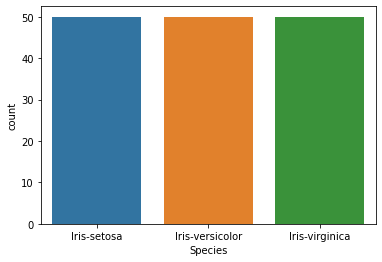

In [7]:
sns.countplot(iris['Species'])

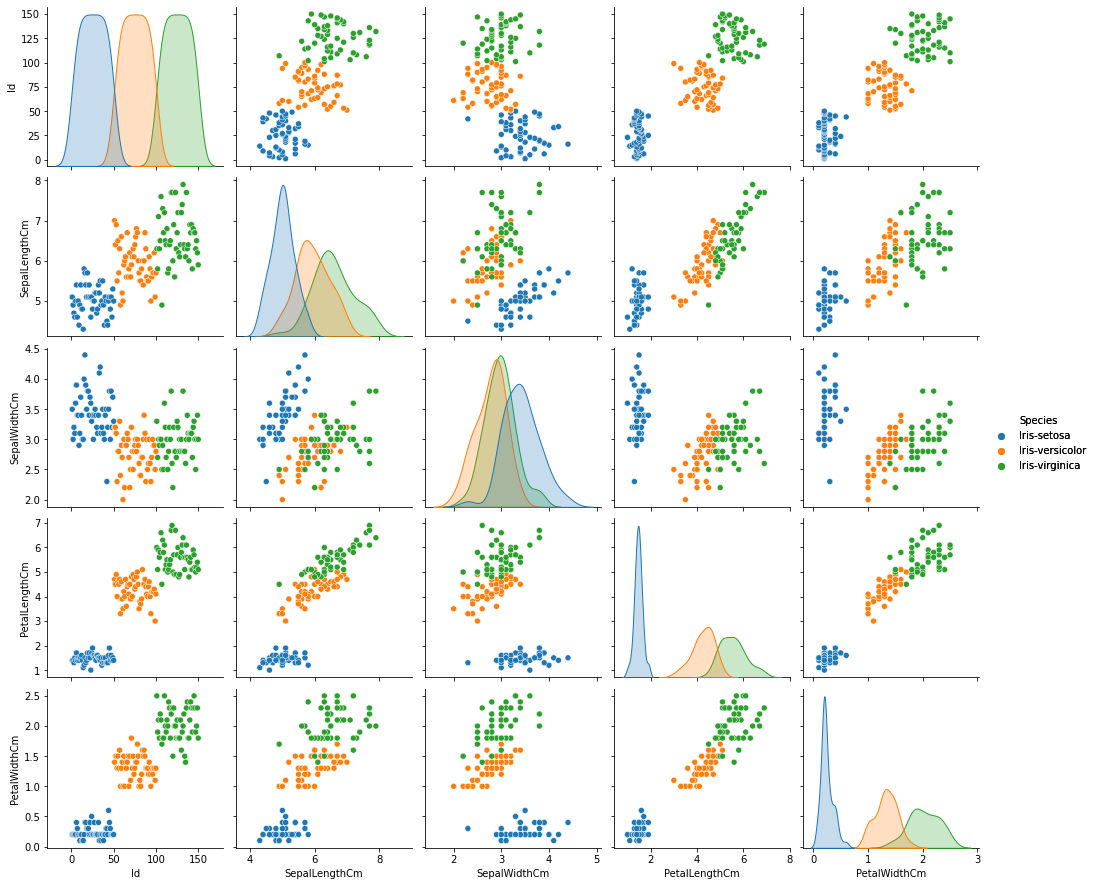

In [8]:
sns.pairplot(iris,hue='Species').add_legend()

In [9]:
#Data Preprocessing
iris=iris.drop(['Id','Species'], axis=1)
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
iris.shape

(150, 4)

<AxesSubplot:>

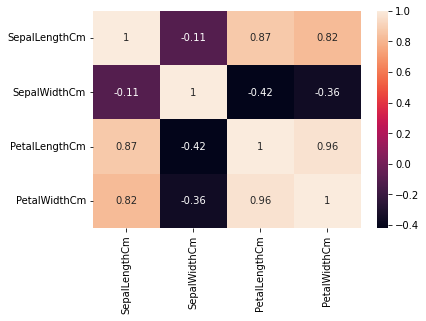

In [11]:
sns.heatmap(iris.corr(),annot=True)

K Means Clustering
A Cluster is a collection of data points aggregated together due to similarities in between.
K Means algorithm identifis k number of centroids, and then allocate every data point to the nearest clusters ,
while keeping the centroids as small as possible.

In [12]:
#Let us find out number of clusters for k-means classification.
data = iris.iloc[:,[0,1,2,3]].values

In [13]:
data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [14]:
#Visualisation of Clusters

Elbow Method runs K-Means clustering on dataset on number of values for k and then for each values of
k computes an average scores for all clusters.

In [15]:
wcss=[]

for i in range(1,10):
    kmeans=KMeans(i)
    kmeans.fit(data)
    wcss_iter=kmeans.inertia_
    wcss.append(wcss_iter)#Within-Cluster Sum of Square
    
wcss

[680.8244,
 152.36870647733906,
 78.94084142614602,
 57.345409315718165,
 46.53558205128205,
 38.930963049671746,
 34.421947665056365,
 29.881402210510913,
 27.766906926406932]

Plotting a result on to a line graph, allowing us to observe 'The elbow '

Text(0, 0.5, 'Within Clusters Sum of squares')

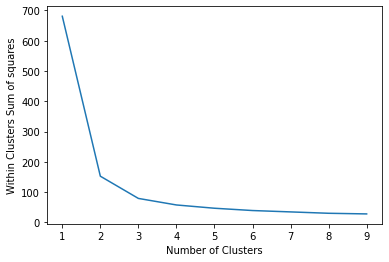

In [16]:
plt.plot(range(1,10),wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('Within Clusters Sum of squares')

From the upper graph we came to know that elbow is at 3 so there will be three clusters.

In [17]:
kmeans = KMeans(n_clusters=3)
data_pred = kmeans.fit_predict(iris)

Clusters

In [18]:
data_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

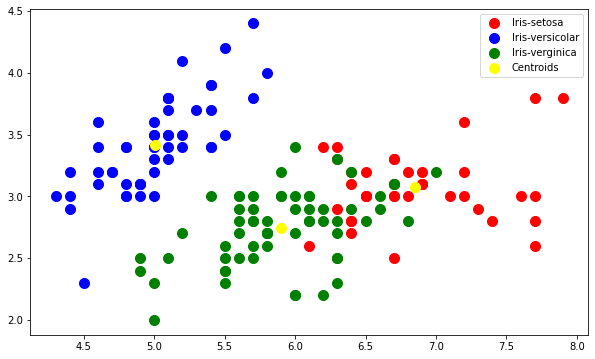

In [19]:
plt.figure(figsize=(10,6))
plt.scatter(data[data_pred == 0,0], data[data_pred == 0,1], s=100,c='red',label='Iris-setosa')
plt.scatter(data[data_pred == 1,0], data[data_pred == 1,1], s=100,c='blue',label='Iris-versicolar')
plt.scatter(data[data_pred == 2,0], data[data_pred == 2,1], s=100,c='green',label='Iris-verginica')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=100,c='yellow',label='Centroids')
plt.legend()

In [20]:
# This is the way to visulize the iris data;